In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/quora-insincere-questions-classification/test.csv
/kaggle/input/quora-insincere-questions-classification/train.csv
/kaggle/input/quora-insincere-questions-classification/sample_submission.csv
/kaggle/input/quora-insincere-questions-classification/embeddings/wiki-news-300d-1M/wiki-news-300d-1M.vec
/kaggle/input/quora-insincere-questions-classification/embeddings/glove.840B.300d/glove.840B.300d.txt
/kaggle/input/quora-insincere-questions-classification/embeddings/paragram_300_sl999/paragram_300_sl999.txt
/kaggle/input/quora-insincere-questions-classification/embeddings/paragram_300_sl999/README.txt
/kaggle/input/quora-insincere-questions-classification/embeddings/GoogleNews-vectors-negative300/GoogleNews-vectors-negative300.bin
/kaggle/input/quoratest/custom.css
/kaggle/input/quoratest/__results__.html
/kaggle/input/quoratest/__output__.json
/kaggle/input/quoratest/__notebook__.ipynb
/kaggle/input/quoratest/gen2.pth
/kaggle/input/quoratest/__results___files/__results___8_1.

In [2]:
from fastai import *
from fastai.text import *
from fastai.callbacks import *

In [3]:
data_lm = TextLMDataBunch.from_csv('/kaggle/input/quora-insincere-questions-classification/','train.csv',text_cols= 'question_text')

In [4]:
data_lm.show_batch()

idx,text
0,"xxbos xxmaj who are some unknown teenage xxmaj quorans ? xxbos xxmaj how dimensionality is reduced based on autoencoder ? xxbos xxmaj was xxmaj france a part of the alliance with xxmaj britain , the xxup usa and the xxup ussr in 1945 after xxup ww2 ? xxbos xxmaj what question can i discuss as a topic on ' xxunk ' for a literature review ? xxbos xxmaj what all"
1,martial artist ever ? xxbos xxmaj what are the 5 things that would make cold calling effective if one is seeking a meeting to speak about investment options or wealth management ? xxbos xxmaj does cubical xxunk depend on the initial volume ? xxbos xxmaj how can i install three xxup os on my laptop ? xxbos xxmaj what are some factors that affect libido ? xxbos xxmaj if the
2,long - xxmaj term xxmaj fat xxmaj loss ? xxbos xxmaj is it possible to become an xxup ies officer without coaching ? xxbos xxmaj what are the xxmaj paytm share price fluctuations over the past 2 years and why ? xxbos xxmaj how many squats must i do to burn 100 calories ? xxbos xxmaj could it be assumed that xxmaj polonius had some culpability in the murder of
3,"had not broken down , life would not have developed on xxmaj earth . xxmaj why ? xxbos xxmaj at what stage in the drug development pipeline is a new lead compound typically patented ? xxbos xxmaj when will xxmaj sm - xxup j700f xxmaj android version xxmaj xxunk xxunk ? xxbos xxmaj what is the best way to have xxmaj many xxunk on xxmaj facebook group ? xxbos xxmaj"
4,xxmaj what should i include in my appeal ? xxbos xxmaj is it alright to address a steward / flight attendant by their name ? xxmaj this question is based on varied comments shot for an answer by xxmaj jake xxmaj williams . xxbos xxmaj what is the best kind of xxunk and meditation for mental disorders ? xxbos xxmaj how can the government tolerate xxmaj violence created by xxmaj


In [5]:
learner= language_model_learner(data_lm,AWD_LSTM,metrics=accuracy,path='/kaggle/working')

In [6]:
learner.load('/kaggle/input/quoratest/gen2');

In [7]:
learner.save_encoder('fine_tuned_enc')

In [8]:
data_class = TextClasDataBunch.from_csv('/kaggle/input/quora-insincere-questions-classification/','train.csv',
                                        valid_pct=0.05, vocab=data_lm.vocab,label_cols='target')

In [9]:
data_class.show_batch()

text,target
xxbos xxmaj what is [ math ] \ frac { \ xxunk } } \ tan ( \ tan ( { \ boxed { \ xxunk } \ sum _ { \ xxunk { \ infty } \ xxunk } \ sum _ { \ xxunk { \ infty } \ underbrace { \ xxunk } } _ { \ xxunk 's xxmaj law of xxmaj theoretical xxmaj probability .,1
"xxbos xxmaj there 's this girl that i 've known since i was 5 ( 20 now ) . i 've had a crush on her since i was 10 . xxmaj what would be the best way to go about asking her out ? xxmaj at this point , i really just want to know whether or not i would "" have a shot "" with her .",0
"xxbos xxmaj what is the etymology of the xxmaj spanish word "" mar "" , the xxmaj english word "" ocean "" or its xxmaj spanish cognate "" xxunk "" and the xxmaj english word "" sea "" ? xxmaj are all related to the concept of a world river or the like , the same way the word "" ocean "" is ?",0
"xxbos xxmaj if one have n’t being getting enough sleep for 3 - 4 mnths ( constantly sleeping from 2 - 7 am ) , and now wants to make up for the bad habit , by getting enough and proper rest ( that can remedy any damage that might have been done ) , how does he go about it ?",0
"xxbos xxmaj you have been locked in a room by your kidnapper for a long time . xxmaj one day , an opportunity for you to escape appears and as you escape , you stumble across two things : a cellphone and a gun . xxmaj if you could only take one with you , which would you take ?",0


In [10]:
classifier = text_classifier_learner(data_class, AWD_LSTM,drop_mult = 0.1,path='/kaggle/working')
classifier.metrics = [accuracy,FBeta(beta=1)]
classifier.load_encoder('fine_tuned_enc');

In [11]:
classifier.fit(10,1e-1)

epoch,train_loss,valid_loss,accuracy,f_beta,time
0,0.225814,0.447693,0.929456,0.404550,06:26
1,0.214352,0.196970,0.937311,0.025238,06:04
2,0.195434,0.218698,0.939425,0.278366,06:09
3,0.218628,0.199128,0.939516,0.315425,06:26
4,0.199436,0.245087,0.937756,0.380996,05:58
5,0.219488,0.740582,0.939853,0.178586,05:54
6,0.220863,0.237752,0.937373,0.058905,06:26
7,0.210498,0.234848,0.939501,0.312511,05:58


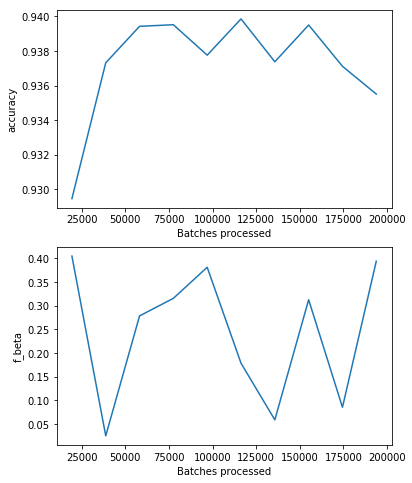

In [12]:
classifier.recorder.plot_metrics()

In [13]:
classifier.save('/kaggle/working/classifier')